In [4]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [8]:
data = pd.read_csv('Advertising.csv')

In [9]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
model = sm.ols('Sales ~ TV + Radio + Newspaper', data).fit()
print(model.params)

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64


In [12]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


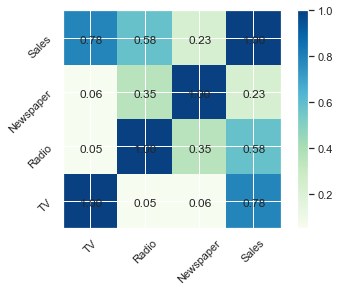

In [33]:
# Plotting correlation heatmap
plt.ylim(-.5,3.5)
plt.imshow(data.corr(), cmap=plt.cm.GnBu, interpolation='nearest',data=True)
plt.colorbar()
tick_marks = [i for i in range(len(data.columns))]
plt.xticks(tick_marks, data.columns, rotation=45)
plt.yticks(tick_marks, data.columns, rotation=45)

# Putting annotations
for i in range(len(data.columns)):
    for j in range(len(data.columns)):
        text = '%.2f'%(data.corr().iloc[i,j])
        plt.text(i-0.2,j-0.1,text)

In [17]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Fri, 28 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        09:19:16   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

## Feature Selection -> Forward Selection

In [22]:
def evaluateModel(model):
    print("RSS = ", ((data.Sales - model.predict())**2).sum())
    print("R2 = ", model.rsquared)

In [23]:
# For TV
model_TV = sm.ols('Sales ~ TV', data).fit()
evaluateModel(model_TV)

RSS =  2102.5305831313512
R2 =  0.611875050850071


In [24]:
# For Radio
model_radio = sm.ols('Sales ~ Radio', data).fit()
evaluateModel(model_radio)

RSS =  3618.479549025088
R2 =  0.33203245544529525


In [25]:
# For Newspaper
model_Newspaper = sm.ols('Sales ~ Newspaper', data).fit()
evaluateModel(model_Newspaper)

RSS =  5134.804544111939
R2 =  0.05212044544430516


In [28]:
# For TV & Radio
model_TV_radio = sm.ols('Sales ~ TV + Radio', data).fit()
evaluateModel(model_TV_radio)

RSS =  556.9139800676182
R2 =  0.8971942610828956


In [30]:
# For TV & Newspaper
model_TV_Newspaper = sm.ols('Sales ~ TV + Newspaper', data).fit()
evaluateModel(model_TV_Newspaper)

RSS =  1918.5618118968275
R2 =  0.6458354938293271


In [32]:
# For TV, Radio & Newspaper
model_all = sm.ols('Sales ~ TV + Radio + Newspaper', data).fit()
evaluateModel(model_all)

RSS =  556.8252629021872
R2 =  0.8972106381789522
